In [38]:
import pandas as pd

file_path = r"C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Machine_Learning\student_performance_project\data\academic_scores.xlsx"

# Load the data
df = pd.read_excel(file_path)


In [39]:
# First few rows
print(df.head(11))

# Info about columns and types
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


    ID No Prog Code  Gender   YoG      CGPA   CGPA100   CGPA200   CGPA300  \
0   42308       ICE  Female  2010  3.227513  2.875000  3.475000  2.615385   
1   70978       BCH  Female  2010  3.576271  3.250000  4.261905  3.368421   
2   31602       BCH    Male  2010  2.211454  1.777778  1.979167  1.489583   
3   63847       BCH    Male  2010  2.702970  2.673913  2.442308  2.000000   
4   30158       BCH  Female  2010  3.881657  3.608696  3.687500  3.625000   
5   51740       BCH    Male  2010  2.970930  2.659574  2.979167  3.281250   
6   76075       BCH    Male  2010  3.337209  3.680851  3.000000  3.437500   
7   60888       BCH  Female  2010  2.559809  2.297872  2.500000  2.285714   
8   43378       BCH    Male  2010  3.764706  3.297872  3.640000  3.875000   
9   80307       BCH  Female  2010  3.958084  3.936170  3.893617  3.812500   
10  82483       BCH  Female  2010  3.988166  3.829787  4.063830  3.562500   

     CGPA400      SGPA  Unnamed: 10 Unnamed: 11  \
0   2.898305  3.125000  

In [40]:
columns_to_keep = [
    "ID No",       # Student ID (optional, for reference)
    "Prog Code",   # Program (e.g., BCH, ICE)
    "Gender",      # Gender
    "YoG",         # Year of Graduation (could help)
    "CGPA100",     # First year GPA
    "CGPA200",     # Second year GPA
    "CGPA300",     # Third year GPA
    "CGPA400"      # Fourth year GPA (used only to generate target)
]


In [41]:
# Clean the full dataset
df = df[columns_to_keep].copy()

# Select only the first 300 records
df_300 = df.head(300)

# Reset index for good measure
df_300.reset_index(drop=True, inplace=True)


C:\Users\Olajide FemVrich\AppData\Local\Temp\ipykernel_5352\3712606093.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='degree_class', order=[


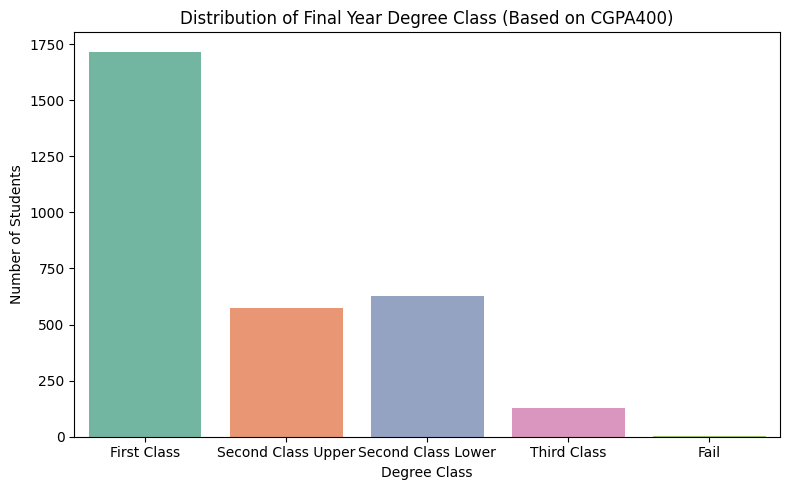

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

def classify_cgpa(cgpa):
    if cgpa >= 3.50:
        return 'First Class'
    elif cgpa >= 3.00:
        return 'Second Class Upper'
    elif cgpa >= 2.00:
        return 'Second Class Lower'
    elif cgpa >= 1.00:
        return 'Third Class'
    else:
        return 'Fail'

df['degree_class'] = df['CGPA400'].apply(classify_cgpa)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='degree_class', order=[
    'First Class', 'Second Class Upper', 'Second Class Lower', 'Third Class', 'Fail'
], palette='Set2')

plt.title('Distribution of Final Year Degree Class (Based on CGPA400)')
plt.xlabel('Degree Class')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()


In [51]:
# Count of each degree class
degree_counts = df['degree_class'].value_counts().reindex([
    'First Class', 'Second Class Upper', 'Second Class Lower', 'Third Class', 'Fail'
])

# Convert to DataFrame with percentage
degree_stats = pd.DataFrame({
    'Count': degree_counts,
    'Percentage': (degree_counts / degree_counts.sum() * 100).round(2)
})

print(degree_stats)


                    Count  Percentage
degree_class                         
First Class          1717       56.37
Second Class Upper    572       18.78
Second Class Lower    626       20.55
Third Class           129        4.24
Fail                    2        0.07


In [42]:
print(df_300.head())
print(df_300.info())


   ID No Prog Code  Gender   YoG   CGPA100   CGPA200   CGPA300   CGPA400
0  42308       ICE  Female  2010  2.875000  3.475000  2.615385  2.898305
1  70978       BCH  Female  2010  3.250000  4.261905  3.368421  3.469388
2  31602       BCH    Male  2010  1.777778  1.979167  1.489583  2.511111
3  63847       BCH    Male  2010  2.673913  2.442308  2.000000  2.348315
4  30158       BCH  Female  2010  3.608696  3.687500  3.625000  4.581395
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID No      300 non-null    int64  
 1   Prog Code  300 non-null    object 
 2   Gender     300 non-null    object 
 3   YoG        300 non-null    int64  
 4   CGPA100    300 non-null    float64
 5   CGPA200    300 non-null    float64
 6   CGPA300    300 non-null    float64
 7   CGPA400    300 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 18.9

In [43]:
# Select and copy the first 300 entries to avoid SettingWithCopyWarning
df_300 = df.head(300).copy()

# Proceed with simulation (no warnings now)
n = df_300.shape[0]

# Simulated numeric values
df_300['jamb_score'] = np.random.randint(180, 321, n)
df_300['waec_score'] = np.random.randint(180, 401, n)
df_300['attendance_rate'] = np.random.uniform(50, 100, n).round(2)
df_300['study_hours_per_week'] = np.random.randint(2, 31, n)
df_300['assignment_score_avg'] = np.random.randint(40, 101, n)

# Simulated categorical values
df_300['class_participation'] = np.random.choice(['High', 'Medium', 'Low'], n)
df_300['parental_education'] = np.random.choice(['None', 'Primary', 'Secondary', 'Tertiary'], n)
df_300['internet_access'] = np.random.choice(['Yes', 'No'], n)
df_300['residence_type'] = np.random.choice(['Hostel', 'Off-campus', 'With Family'], n)
df_300['has_scholarship'] = np.random.choice(['Yes', 'No'], n)

# Simulated geopolitical zones (biased distribution)
zones = ['South West', 'South East', 'North Central', 'South South', 'North West', 'North East']
zone_weights = [0.40, 0.25, 0.10, 0.10, 0.10, 0.05]
df_300['state_of_origin'] = np.random.choice(zones, size=n, p=zone_weights)


In [44]:
df_300.head()

,ID No,Prog Code,Gender,YoG,CGPA100,CGPA200,CGPA300,CGPA400,jamb_score,waec_score,attendance_rate,study_hours_per_week,assignment_score_avg,class_participation,parental_education,internet_access,residence_type,has_scholarship,state_of_origin
0,42308,ICE,Female,2010,2.875000,3.475000,2.615385,2.898305,232,311,93.87,26,70,Low,Primary,Yes,Hostel,No,South East
1,70978,BCH,Female,2010,3.250000,4.261905,3.368421,3.469388,265,279,52.01,18,60,Low,None,No,With Family,No,North Central
2,31602,BCH,Male,2010,1.777778,1.979167,1.489583,2.511111,181,233,90.24,17,65,Medium,Secondary,No,With Family,No,North West
3,63847,BCH,Male,2010,2.673913,2.442308,2.000000,2.348315,265,301,68.45,9,80,High,Tertiary,Yes,Off-campus,Yes,North West
4,30158,BCH,Female,2010,3.608696,3.687500,3.625000,4.581395,312,204,92.73,18,97,Low,None,No,With Family,Yes,North Central


In [45]:
print(df_300.columns)

Index(['ID No', 'Prog Code', 'Gender', 'YoG', 'CGPA100', 'CGPA200', 'CGPA300',
       'CGPA400', 'jamb_score', 'waec_score', 'attendance_rate',
       'study_hours_per_week', 'assignment_score_avg', 'class_participation',
       'parental_education', 'internet_access', 'residence_type',
       'has_scholarship', 'state_of_origin'],
      dtype='object')


In [46]:
ordered_columns = [
    # Identity
    'ID No', 'Prog Code', 'Gender',

    # Demographics
    'state_of_origin', 'residence_type', 'parental_education',
    'internet_access', 'has_scholarship',

    # Entry scores
    'waec_score', 'jamb_score',

    # Behavior
    'attendance_rate', 'study_hours_per_week',
    'assignment_score_avg', 'class_participation',

    # Academic performance up to 300 level
    'CGPA100', 'CGPA200', 'CGPA300',

    # Target (for now)
    'CGPA400'
]

# Clean and reorder
df_300.drop(columns=['YoG'], inplace=True)
df_300 = df_300[ordered_columns]


In [47]:
print(df_300.columns)

Index(['ID No', 'Prog Code', 'Gender', 'state_of_origin', 'residence_type',
       'parental_education', 'internet_access', 'has_scholarship',
       'waec_score', 'jamb_score', 'attendance_rate', 'study_hours_per_week',
       'assignment_score_avg', 'class_participation', 'CGPA100', 'CGPA200',
       'CGPA300', 'CGPA400'],
      dtype='object')


C:\Users\Olajide FemVrich\AppData\Local\Temp\ipykernel_5352\880040847.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_300, x='degree_class', order=[


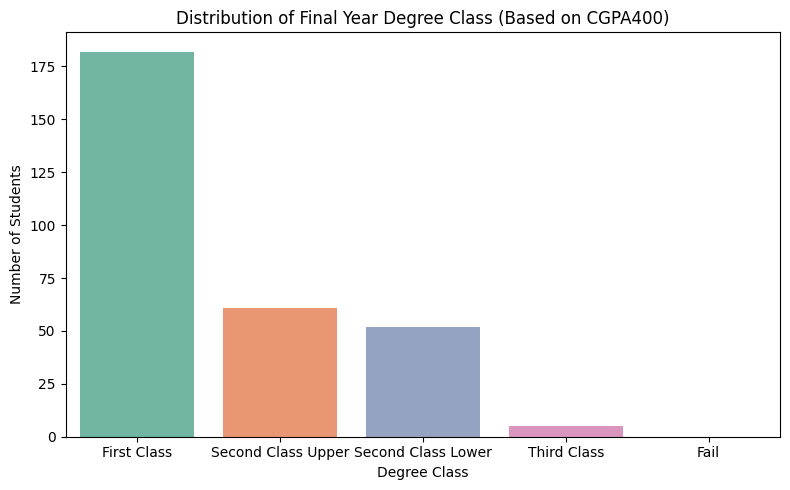

In [49]:
def classify_cgpa(cgpa):
    if cgpa >= 3.50:
        return 'First Class'
    elif cgpa >= 3.00:
        return 'Second Class Upper'
    elif cgpa >= 2.00:
        return 'Second Class Lower'
    elif cgpa >= 1.00:
        return 'Third Class'
    else:
        return 'Fail'

df_300['degree_class'] = df_300['CGPA400'].apply(classify_cgpa)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_300, x='degree_class', order=[
    'First Class', 'Second Class Upper', 'Second Class Lower', 'Third Class', 'Fail'
], palette='Set2')

plt.title('Distribution of Final Year Degree Class (Based on CGPA400)')
plt.xlabel('Degree Class')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()


In [34]:
# 1. Create risk label from CGPA400
df_300['is_at_risk'] = df_300['CGPA400'].apply(lambda x: 'Yes' if x < 1.99 else 'No')

# 2. Drop CGPA300 and CGPA400 — we assume we're predicting at 200 level
df_300.drop(columns=['CGPA300', 'CGPA400'], inplace=True)

# 3. Reorder so is_at_risk is last column
cols = [col for col in df_300.columns if col != 'is_at_risk'] + ['is_at_risk']
df_300 = df_300[cols]


In [35]:
df_300.head(17)

,ID No,Prog Code,Gender,state_of_origin,residence_type,parental_education,internet_access,has_scholarship,waec_score,jamb_score,attendance_rate,study_hours_per_week,assignment_score_avg,class_participation,CGPA100,CGPA200,is_at_risk
0,42308,ICE,Female,South West,Off-campus,Secondary,No,No,208,306,83.70,2,70,Medium,2.875000,3.475000,No
1,70978,BCH,Female,North West,With Family,Primary,No,Yes,305,313,92.22,22,97,High,3.250000,4.261905,No
2,31602,BCH,Male,South West,Off-campus,Primary,Yes,Yes,332,204,95.79,3,62,Medium,1.777778,1.979167,No
3,63847,BCH,Male,North East,Off-campus,Primary,Yes,Yes,362,264,85.90,19,93,Medium,2.673913,2.442308,No
4,30158,BCH,Female,South South,With Family,Primary,Yes,No,260,234,64.18,16,92,Medium,3.608696,3.687500,No
5,51740,BCH,Male,South East,Off-campus,Secondary,Yes,No,353,274,66.31,2,59,Low,2.659574,2.979167,No
6,76075,BCH,Male,North East,With Family,Primary,No,No,331,298,51.04,6,54,Medium,3.680851,3.000000,No
7,60888,BCH,Female,South West,With Family,Primary,Yes,No,254,188,88.04,3,62,Medium,2.297872,2.500000,No
8,43378,BCH,Male,South West,Off-campus,None,Yes,No,205,221,52.14,21,67,Medium,3.297872,3.640000,No
9,80307,BCH,Female,South East,With Family,Secondary,Yes,Yes,306,232,93.23,4,55,Low,3.936170,3.893617,No


In [36]:
df_300['is_at_risk'].value_counts()

is_at_risk
No     295
Yes      5
Name: count, dtype: int64